# HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [2]:
#lets load the data set in our system 

In [165]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns
pd.set_option('display.max_columns', None)

In [166]:
df=pd.read_csv('HR_data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [167]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
107,25,Yes,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,Male,46,2,2,Sales Executive,3,Single,5744,26959,1,Y,Yes,11,3,4,80,0,6,1,3,6,4,0,3
873,36,No,Travel_Rarely,917,Research & Development,6,4,Life Sciences,1,1221,3,Male,60,1,1,Laboratory Technician,3,Divorced,2741,6865,1,Y,No,14,3,3,80,1,7,4,3,7,7,1,7
1379,27,Yes,Travel_Frequently,1337,Human Resources,22,3,Human Resources,1,1944,1,Female,58,2,1,Human Resources,2,Married,2863,19555,1,Y,No,12,3,1,80,0,1,2,3,1,0,0,0
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,47,1,Male,86,2,1,Sales Representative,3,Married,2683,3810,1,Y,Yes,14,3,3,80,0,3,2,3,3,2,0,2
884,40,No,Travel_Rarely,107,Sales,10,3,Technical Degree,1,1239,2,Female,84,2,2,Sales Executive,2,Divorced,6852,11591,7,Y,No,12,3,2,80,1,7,2,4,5,1,1,3


# Data preprocessing

In [168]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [169]:
df = df.drop('Over18', axis=1)
#because there is no unique ness in feature column

# EDA Process
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable.

In [170]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [171]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

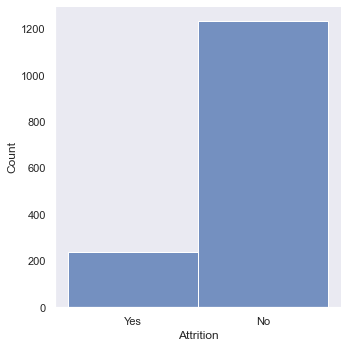

In [172]:
sns.displot(df['Attrition'])

Observations:

    1.As seen from above distribution plot that classes are not equally distributed,Hence we have to use imbalance learn for data balancing.

In [173]:
df.shape

(1470, 34)

observations:
    1. total of 1470 rows are present in dataset and 34 feature columns after data preprocessing.

In [174]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

<AxesSubplot:>

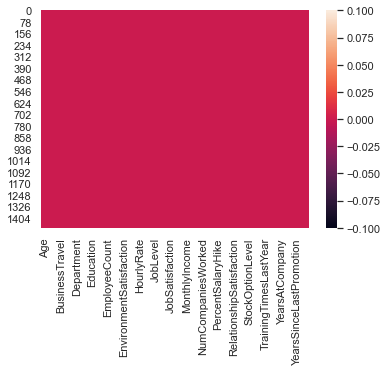

In [175]:
import seaborn as sns
sns.heatmap(df.isnull())

observations:

    1.As observe from the above there is no null values count,we can easily visulize in this heat map plotting.

# visulization the Attrition with gender column.

In [176]:
import plotly.express as px
#Yes = df[df['type'] == 'Yes']
#No = df[df['type'] == 'No']

fig = px.histogram(df, x='Attrition', color='Gender',
                   marginal='box', # or violin, rug
                   hover_data=df.columns)


fig.show()

observations:

1.So, on average, Male Employes left the comapany more as compare to female employes..

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observations:
    1.int64(26), object(8)
    2.lets change the type of object dtype to int dtype.

# Label Encoder
we use labele Encoder for changing types of object data type to int datatype

In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

In [179]:
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])

In [180]:
df['Department'] = le.fit_transform(df['Department'])

In [181]:
df['EducationField'] = le.fit_transform(df['EducationField'])

In [182]:
df['JobRole'] = le.fit_transform(df['JobRole'])

In [183]:
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

In [184]:
df['Gender'] = le.fit_transform(df['Gender'])

In [185]:
df['OverTime'] = le.fit_transform(df['OverTime'])

In [186]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

# Now use subplot and displot to check data are normalised or not.

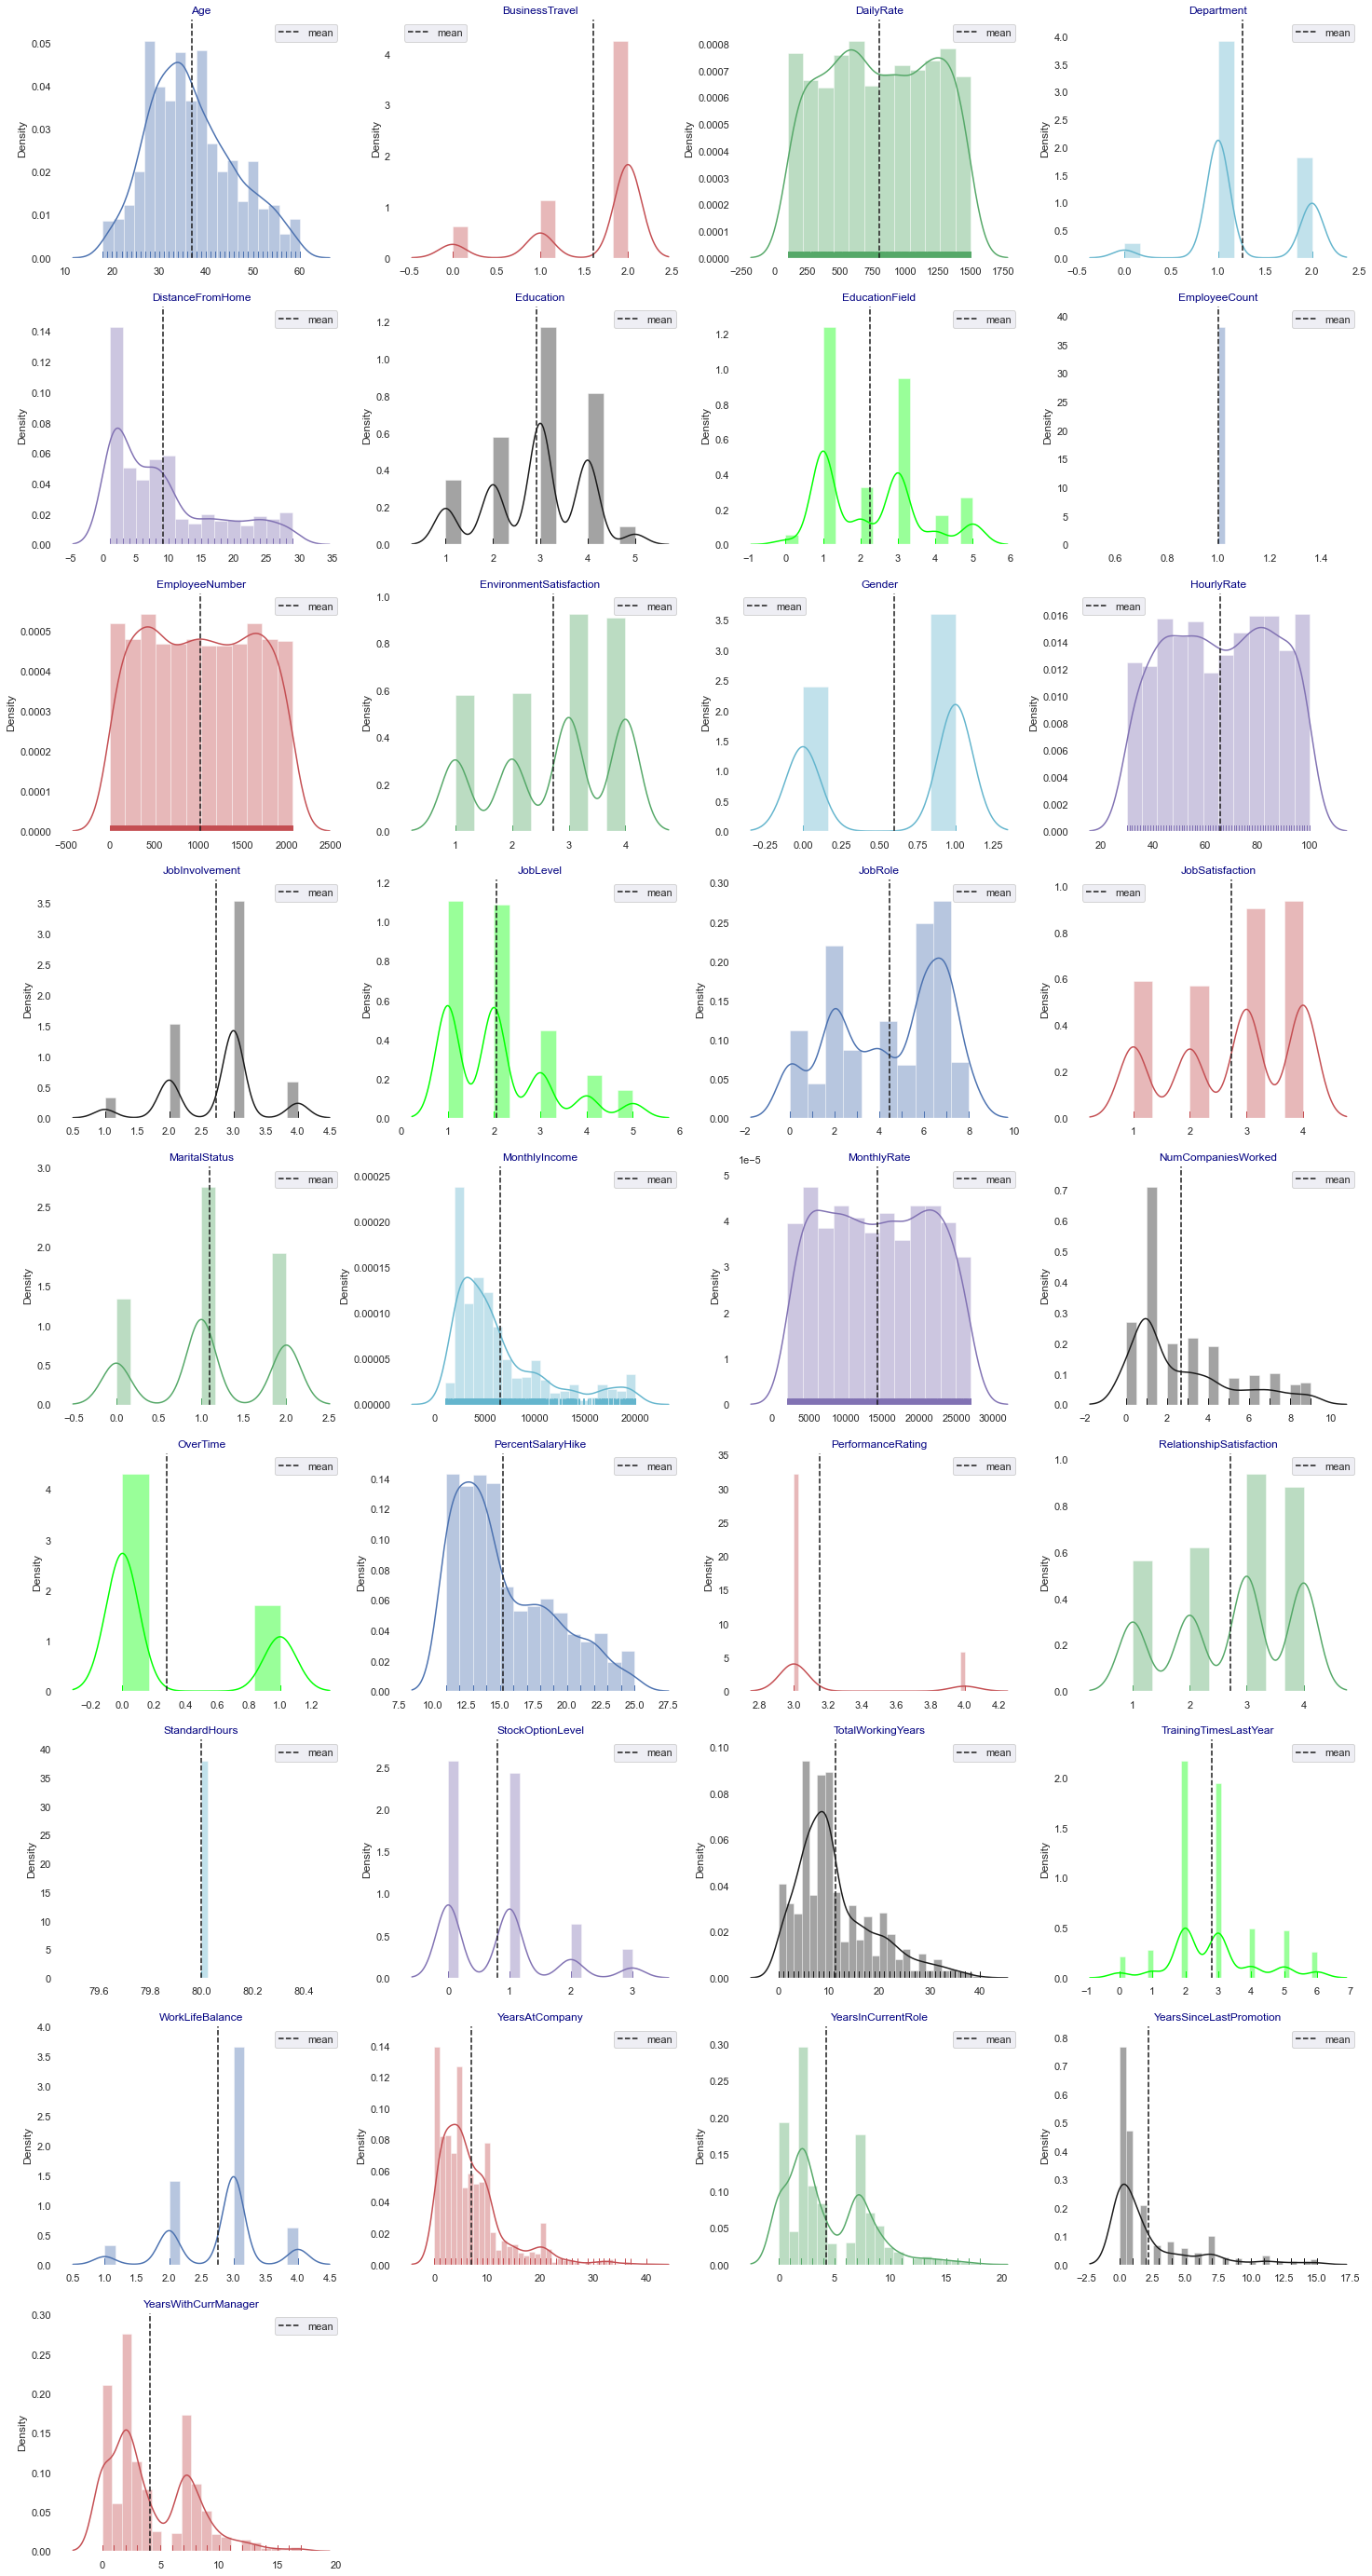

In [188]:
import itertools
import matplotlib.pyplot as plt
cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b","r","g","c","m","k","lime","b","r","g","c","m","k","lime","b","r","g","c","m","k","lime","b","r","g","k","r"]
fig = plt.figure(figsize=(25,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(9,4,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:

    1. From above plotting of distribution plot we see that some features columns are not normally distributed.
    
    2. some columns are skewed towards right.
    
    3. Building blocks are out of the normal curve hence outliers are present.

# CORRELATION BETWEEN THE COLUMNS:

In [189]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


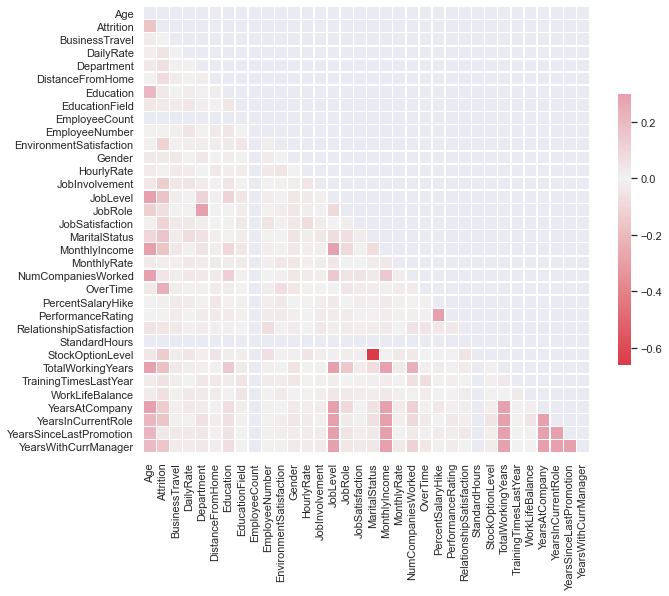

In [144]:
import matplotlib.pyplot as plt
import numpy as np
correlations = df.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<AxesSubplot:>

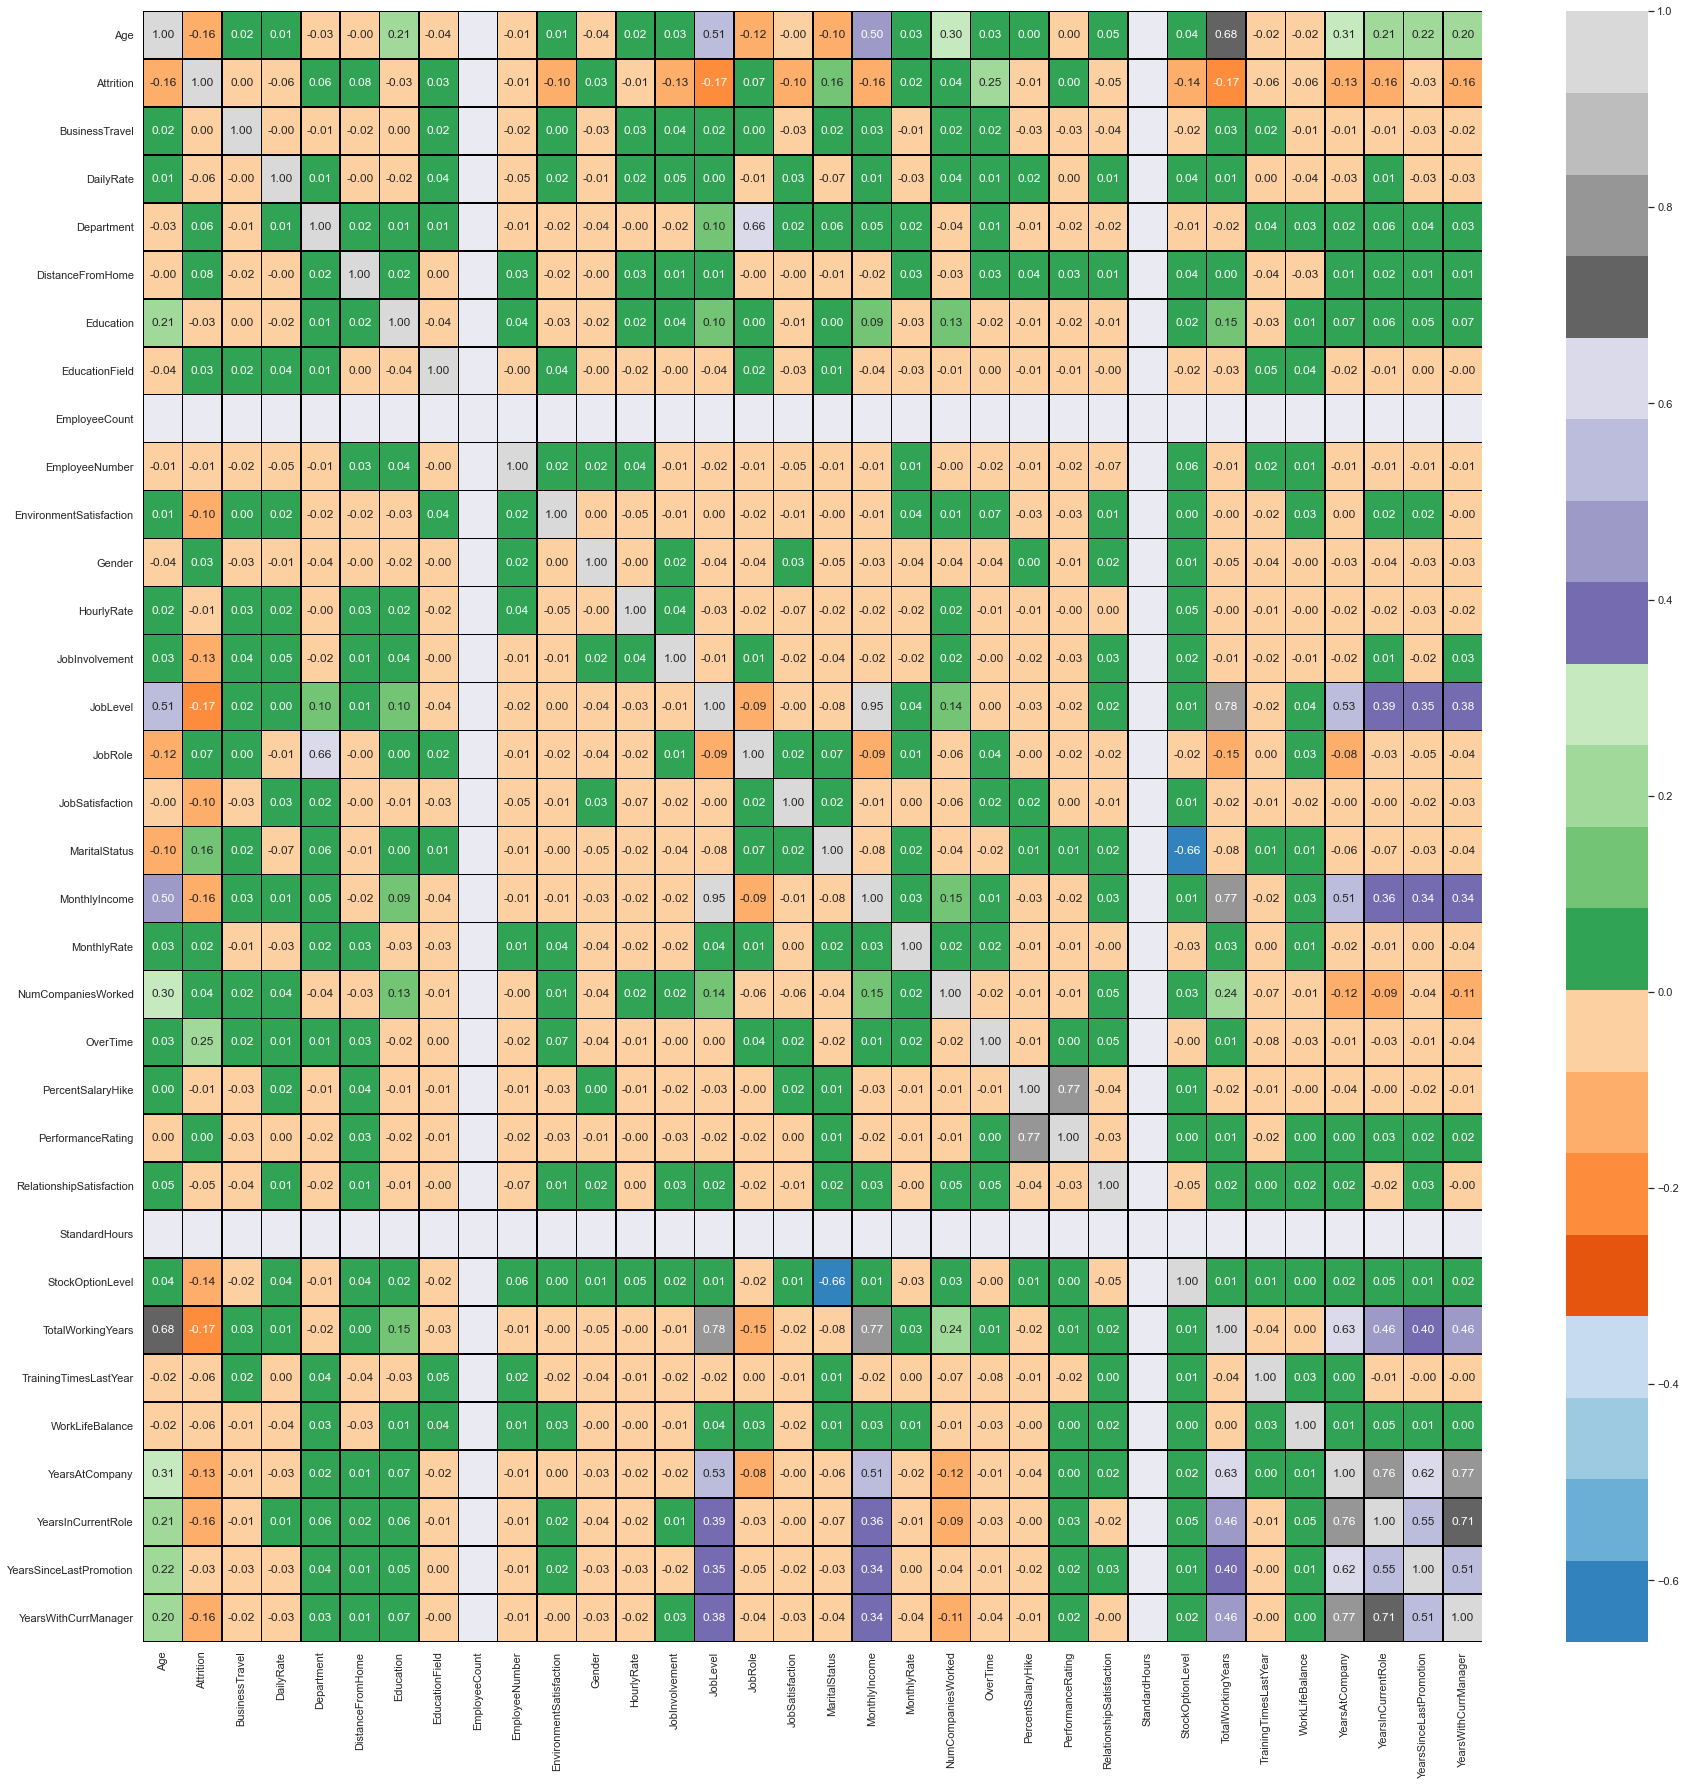

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',cmap="tab20c")

Correlation: From the above result it is clear that some columns making positive correlation and some making negative correlation.




The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.

# Discription of dataset

In [306]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,65.891156,2.729932,4.458503,2.728571,1.097279,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,2.799320,2.761224,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,20.329428,0.711561,2.461821,1.102846,0.730121,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,1.289271,0.706476,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,30.000000,1.000000,0.000000,1.000000,0.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,48.000000,2.000000,2.000000,2.000000,1.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,5.000000,3.000000,1.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,7.000000,4.000000,2.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,3.000000,3.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,8.000000,4.000000,2.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,6.000000,4.000000,18.000000,15.000000,17.000000


# PLOTTING THE DISCRIPTION OF DATASET

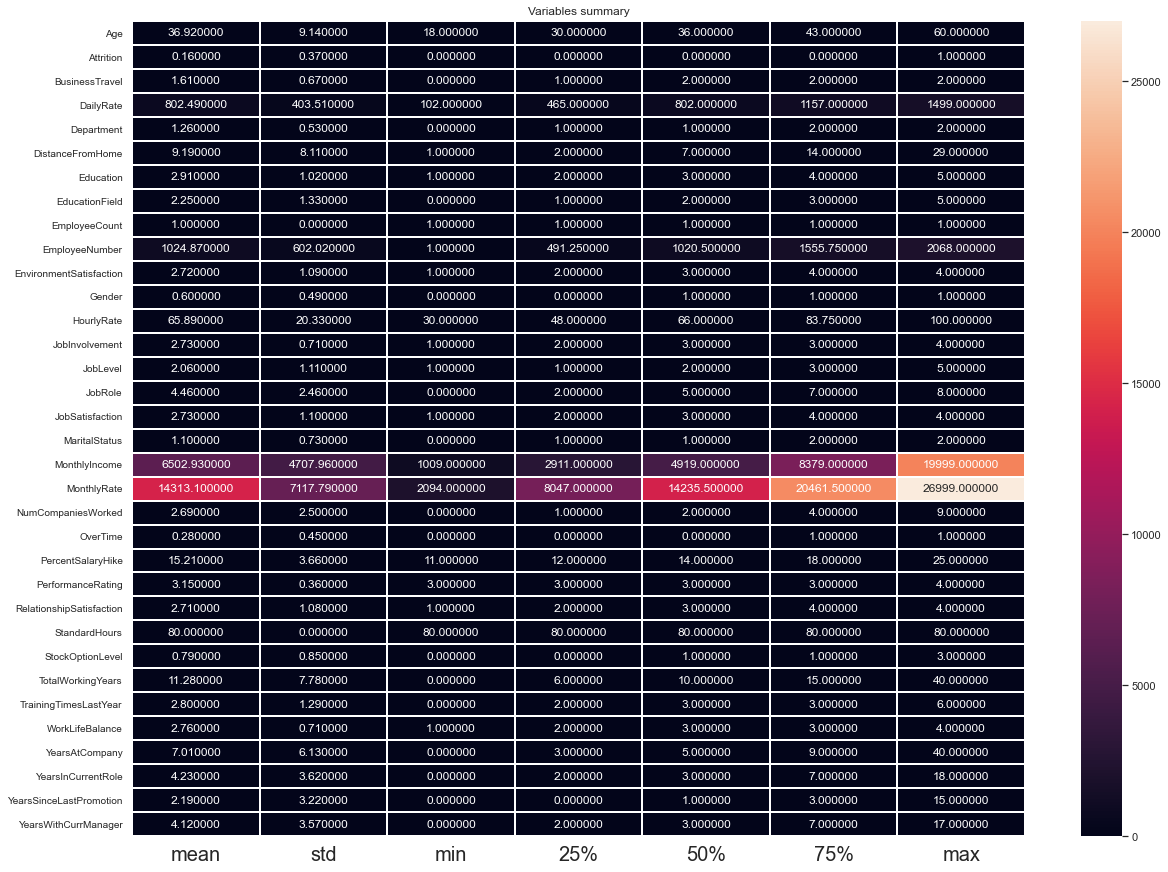

In [192]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.title("Variables summary")
plt.show()


From above ploting we can easily look at mean,std-deviation,min and max values of each columns,it helps in futher data cleaning.

In [193]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,80,0,17,3,2,9,6,0,8


# Principal component analysis
Principal component analysis (PCA) is the process of computing the principal components. and cheak the collinearity.

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [195]:
x=df.drop('Attrition', axis=1)

In [196]:
x.shape

(1470, 33)

In [197]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,80,0,17,3,2,9,6,0,8


In [198]:
y=df["Attrition"]

In [199]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [200]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [201]:
vif_calc()

    VIF Factor                  features
0     2.054226                       Age
1     1.016808            BusinessTravel
2     1.026401                 DailyRate
3     1.942165                Department
4     1.018096          DistanceFromHome
5     1.065295                 Education
6     1.016240            EducationField
7     0.000000             EmployeeCount
8     1.022699            EmployeeNumber
9     1.018022   EnvironmentSatisfaction
10    1.020038                    Gender
11    1.021984                HourlyRate
12    1.020836            JobInvolvement
13   11.825039                  JobLevel
14    1.894366                   JobRole
15    1.022894           JobSatisfaction
16    1.844040             MaritalStatus
17   11.055038             MonthlyIncome
18    1.015803               MonthlyRate
19    1.261958        NumCompaniesWorked
20    1.028856                  OverTime
21    2.521583         PercentSalaryHike
22    2.519973         PerformanceRating
23    1.025574  

In [203]:
df = df.drop(['Department','EmployeeCount','JobLevel','MonthlyIncome','TotalWorkingYears','YearsAtCompany'], axis=1)

In [207]:
df = df.drop('StandardHours', axis=1)

we drop highly correlated columns..

# Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

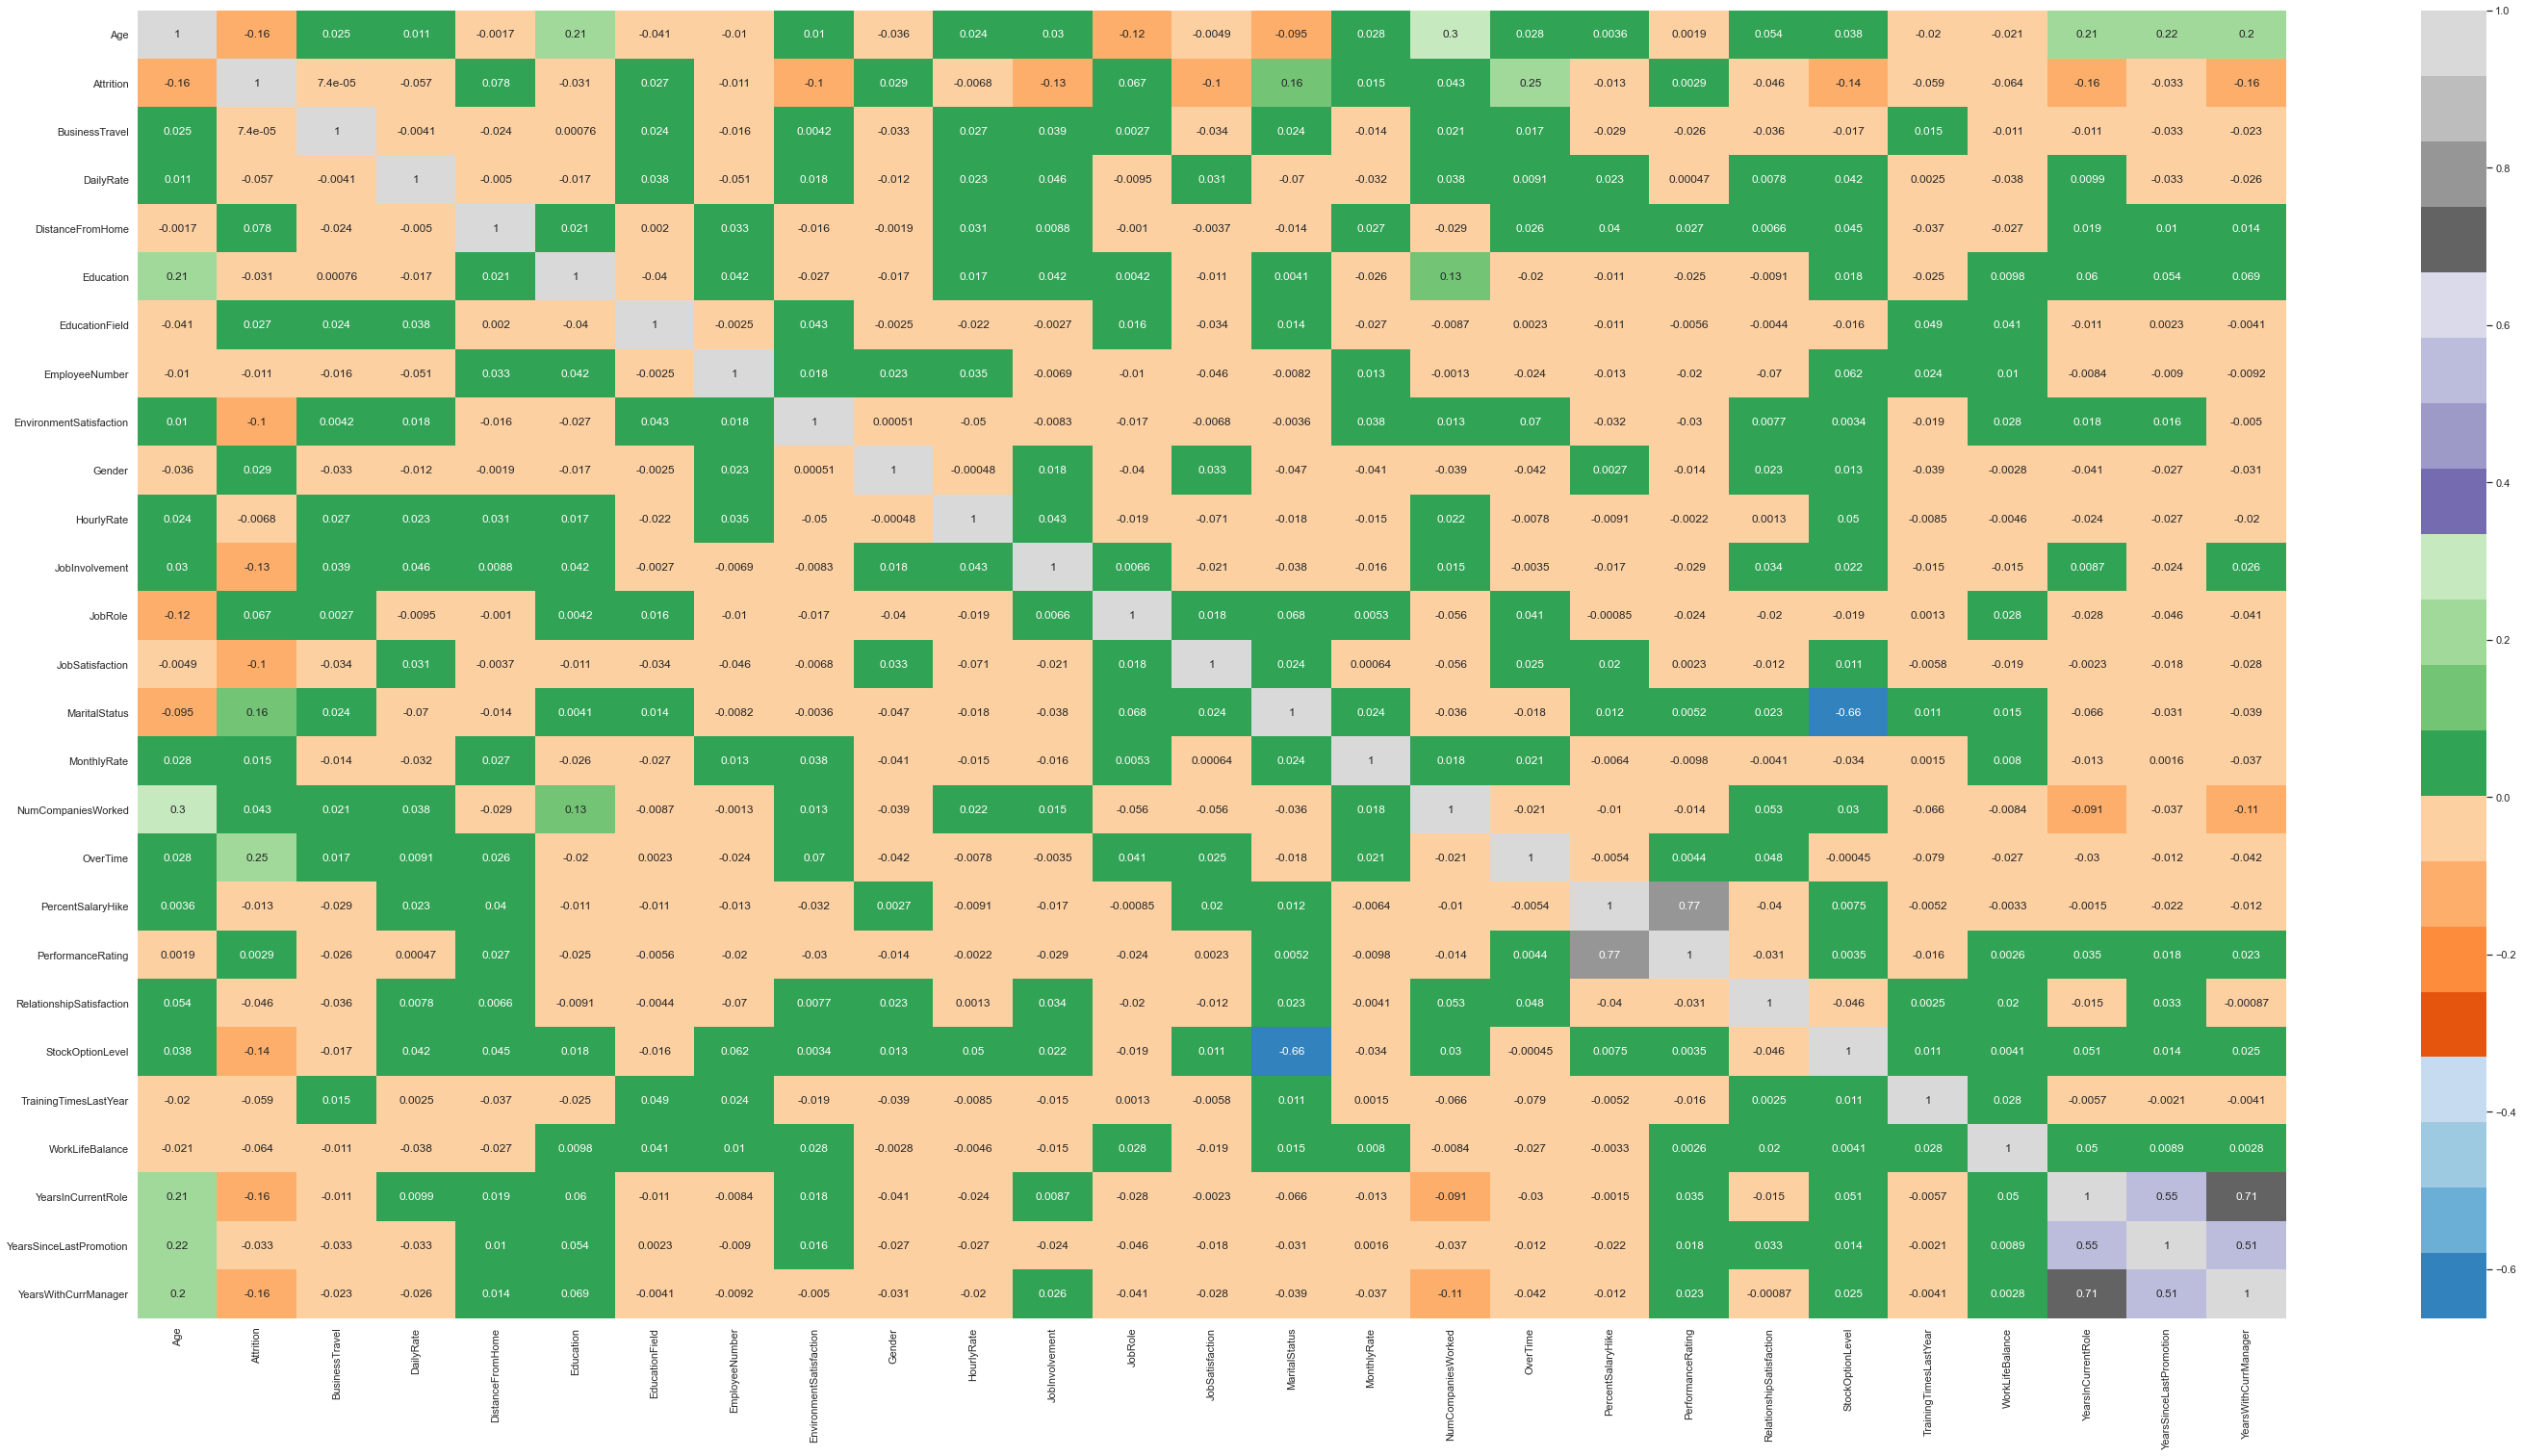

In [208]:
plt.figure(figsize = (50,25))
sns.heatmap(df.corr(),annot = True,cmap="tab20c")
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EducationField'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobRole'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <A

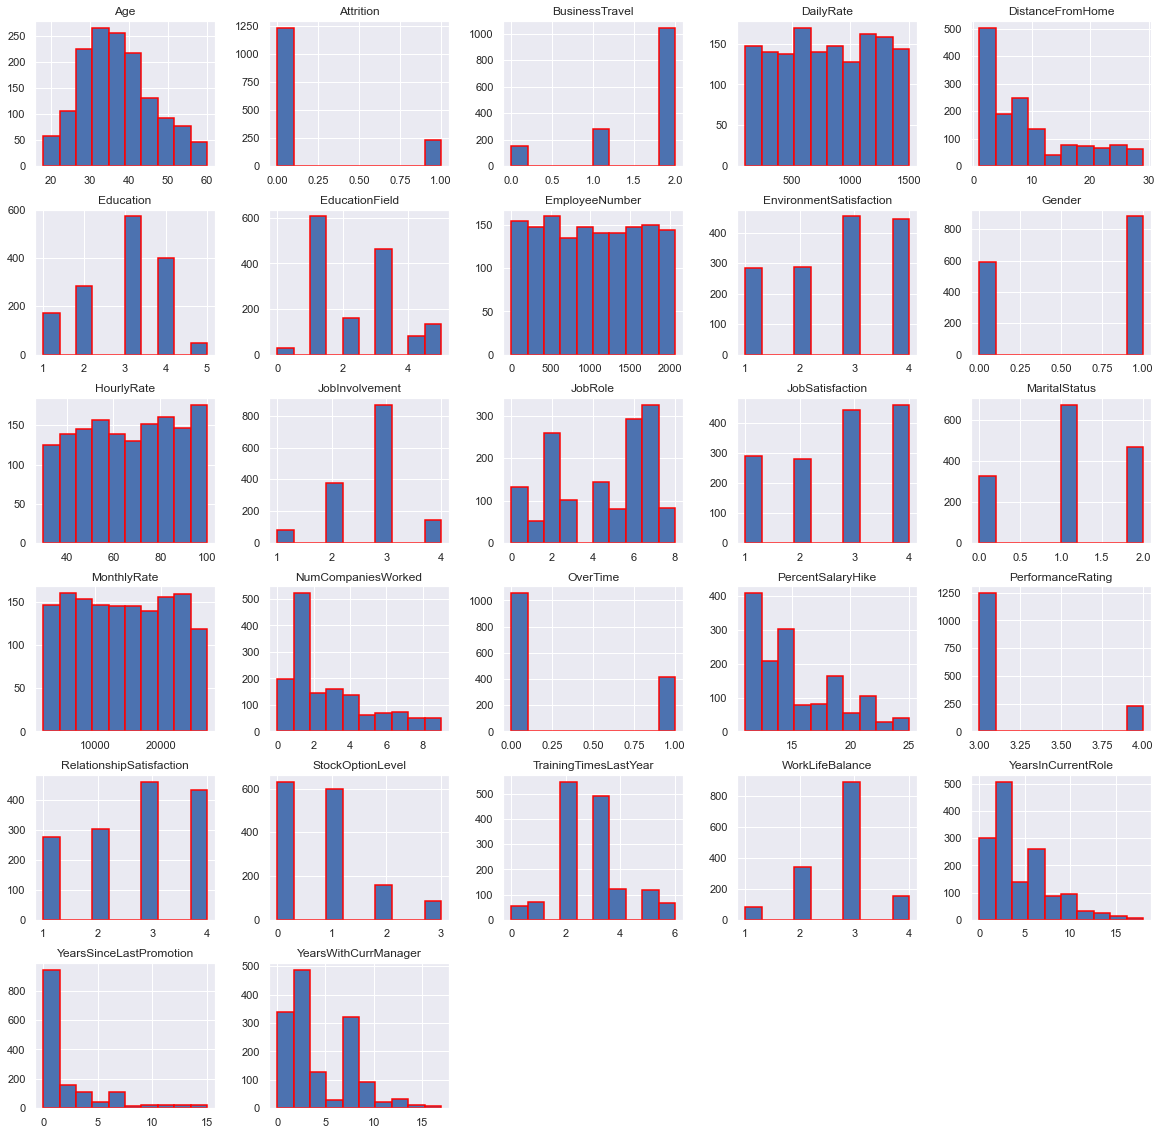

In [209]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

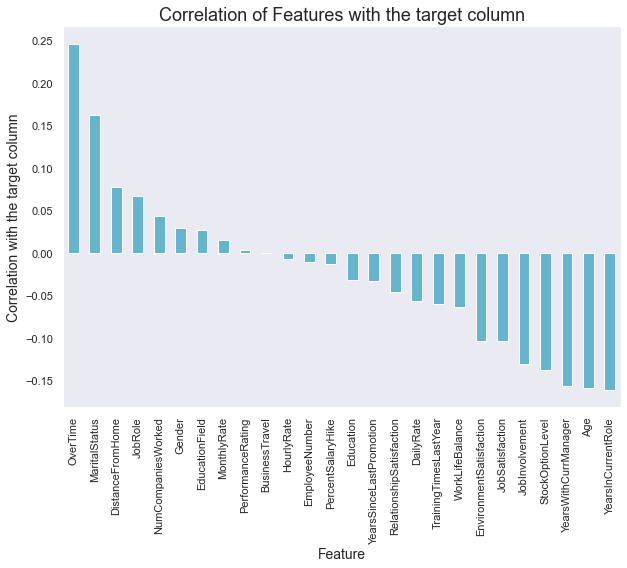

In [213]:
plt.figure(figsize=(10,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


# cheak the skewness:

In [214]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

# Detecting outliers:

<AxesSubplot:>

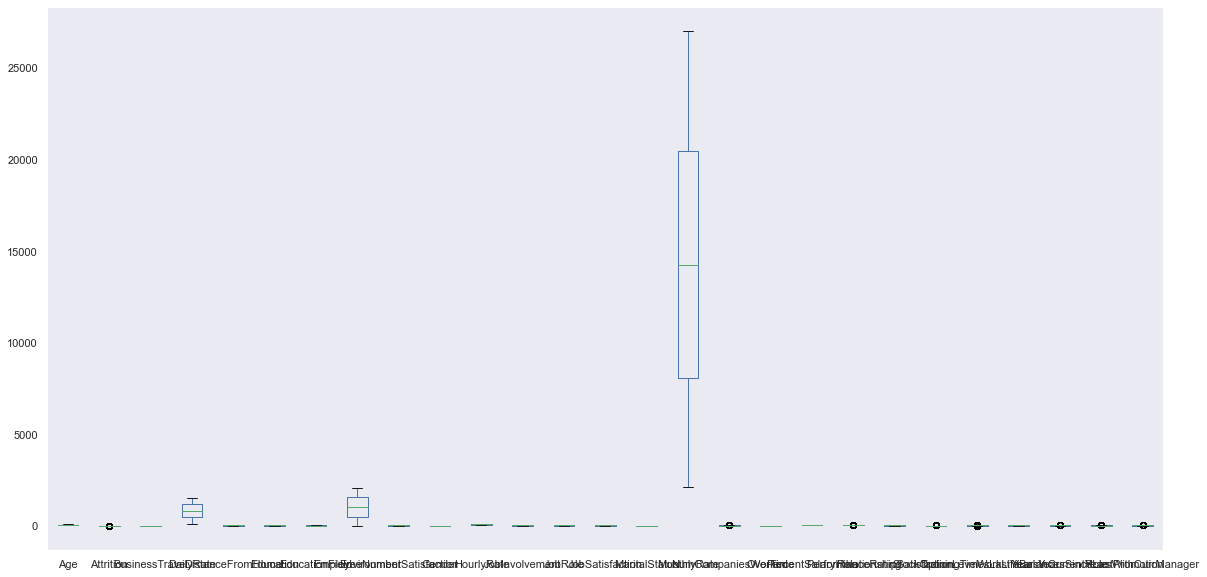

In [215]:
df.plot.box(figsize=(20,10))

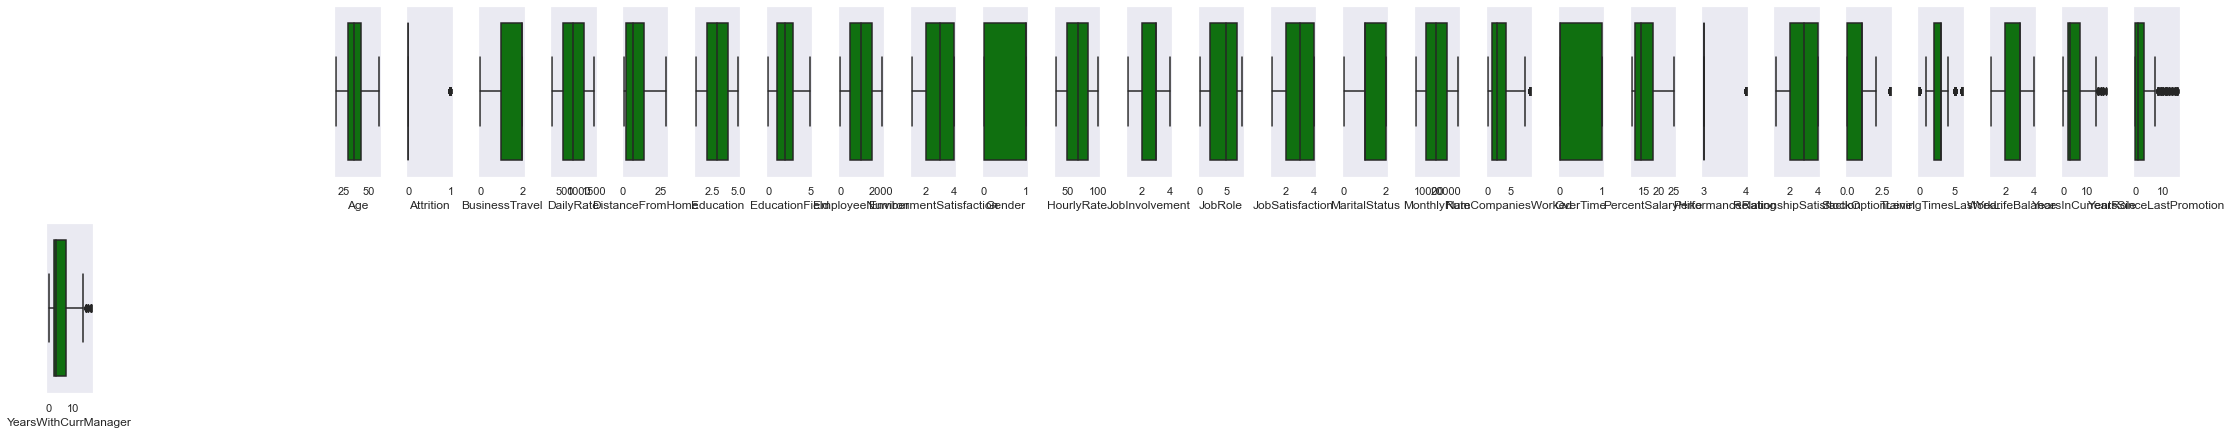

In [216]:
collist=df.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


# Check the percentage of data falls under outliers:

In [217]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   63,   64,  110,  123,  123,  123,  126,  153,
         178,  187,  190,  218,  231,  231,  237,  281,  326,  386,  386,
         425,  427,  466,  535,  561,  584,  595,  616,  635,  653,  686,
         701,  716,  746,  752,  799,  838,  861,  875,  875,  914,  922,
         926,  926,  937,  976,  976, 1008, 1024, 1078, 1078, 1086, 1093,
        1138, 1156, 1221, 1223, 1242, 1295, 1301, 1303, 1327, 1331, 1348,
        1351, 1414, 1430], dtype=int64),
 array([26, 25, 25, 24, 25, 25, 24, 25, 26, 25, 26, 25, 26, 24, 25, 24, 26,
        25, 24, 25, 25, 26, 25, 25, 24, 25, 26, 25, 25, 26, 26, 25, 26, 25,
        24, 24, 25, 25, 25, 25, 25, 26, 25, 25, 25, 26, 25, 24, 25, 25, 24,
        25, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 25, 26, 24, 25,
        24], dtype=int64))

In [218]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,1,2,1,1,2,0,94,3,7,4,2,19479,8,1,11,3,1,0,0,1,4,0,5
1,49,0,1,279,8,1,1,2,3,1,61,2,6,2,1,24907,1,0,23,4,4,1,3,3,7,1,7
2,37,1,2,1373,2,2,4,4,4,1,92,2,2,3,2,2396,6,1,15,3,2,0,3,3,0,0,0
3,33,0,1,1392,3,4,1,5,4,0,56,3,6,3,1,23159,1,1,11,3,3,0,3,3,7,3,0
4,27,0,2,591,2,1,3,7,1,1,40,3,2,2,1,16632,9,0,12,3,4,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,23,2,3,2061,3,1,41,4,2,4,1,12290,4,0,17,3,3,1,3,3,2,0,3
1466,39,0,2,613,6,1,3,2062,4,1,42,2,0,1,1,21457,4,0,15,3,1,1,5,3,7,1,7
1467,27,0,2,155,4,3,1,2064,2,1,87,4,4,2,1,5174,1,1,20,4,2,1,0,3,2,0,3
1468,49,0,1,1023,2,3,3,2065,4,1,63,2,7,2,1,13243,2,0,14,3,4,0,3,2,6,0,8


In [219]:
df.shape

(1470, 27)

In [220]:
df_new.shape

(1409, 27)

In [221]:
percentage_loss=((1470-1409)/1470)*100
print(percentage_loss)

4.149659863945578


observations:

1.The data loss is 4.14 percentile,which is under 10% so we go for further data cleaning.

# Split the dataset in input columns and target columns..

In [222]:
x=df.drop('Attrition', axis=1)

In [223]:
y=df["Attrition"]

In [224]:
x.shape

(1470, 26)

In [225]:
y.shape

(1470,)

# Removing skewness by transforming data.

In [226]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.52213976,  0.63546836,  0.7592893 , ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.39286498, -1.33459724, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  0.63546836,  1.34036452, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507,  0.63546836, -1.75171312, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -1.39286498,  0.58323545, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832,  0.63546836, -0.35884464, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [227]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.52213976,  0.63546836,  0.7592893 , ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.39286498, -1.33459724, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  0.63546836,  1.34036452, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507,  0.63546836, -1.75171312, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -1.39286498,  0.58323545, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832,  0.63546836, -0.35884464, ..., -0.08961473,
         0.09685415, -0.40688122]])

# Since the column has binary variable we will use logistic classification model
Regressor Model Building:


# Logistic Regression:

In [230]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [232]:
from imblearn.over_sampling import SMOTE

In [233]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [234]:
np.bincount(y)

array([1233,  237], dtype=int64)

In [235]:
y_train.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [236]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100)

At random state 6  The model performs very well
At random_state:- 6
Training accuracy_score is:- 87.41496598639455
Testing accuracy_score is:- 87.41496598639455
At random state 9  The model performs very well
At random_state:- 9
Training accuracy_score is:- 87.07482993197279
Testing accuracy_score is:- 87.07482993197279
At random state 11  The model performs very well
At random_state:- 11
Training accuracy_score is:- 87.41496598639455
Testing accuracy_score is:- 87.41496598639455
At random state 48  The model performs very well
At random_state:- 48
Training accuracy_score is:- 87.07482993197279
Testing accuracy_score is:- 87.07482993197279
At random state 63  The model performs very well
At random_state:- 63
Training accuracy_score is:- 87.07482993197279
Testing accuracy_score is:- 87.07482993197279
At random state 90  The model performs very well
At random_state:- 90
Training accuracy_score is:- 87.07482993197279
Testing accuracy_score is:- 87.07482993197279
At random state 351  The m

In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=849,test_size=0.20)

In [239]:
x_train.shape

(1176, 26)

In [240]:
y_train.shape

(1176,)

In [241]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=849,test_size=0.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.8741496598639455

In [242]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:',mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_test)))


Error:
Mean Absolute Error: 0.12585034013605442
Mean Squared Error: 0.12585034013605442
Root Mean Square Error: 0.35475391489884145


In [243]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       246
           1       0.82      0.29      0.43        48

    accuracy                           0.87       294
   macro avg       0.85      0.64      0.68       294
weighted avg       0.87      0.87      0.85       294



In [244]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs=accuracy_score (y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-", j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lrs*100)
    print("\n")

At cv:- 2
Cross validation score is :- 86.05442176870748
accuracy_score is :- 87.41496598639455


At cv:- 3
Cross validation score is :- 86.4625850340136
accuracy_score is :- 87.41496598639455


At cv:- 4
Cross validation score is :- 86.46302274612013
accuracy_score is :- 87.41496598639455


At cv:- 5
Cross validation score is :- 86.5986394557823
accuracy_score is :- 87.41496598639455


At cv:- 6
Cross validation score is :- 86.66666666666667
accuracy_score is :- 87.41496598639455


At cv:- 7
Cross validation score is :- 86.53061224489795
accuracy_score is :- 87.41496598639455


At cv:- 8
Cross validation score is :- 86.73638334521264
accuracy_score is :- 87.41496598639455


At cv:- 9
Cross validation score is :- 86.60032919347597
accuracy_score is :- 87.41496598639455




In [245]:
rscore=cross_val_score(lr,x,y,cv=8)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 86.60032919347597
accuracy_score is :- 87.41496598639455


In [246]:
lrs*100

87.41496598639455

In [247]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[243   3]
 [ 34  14]]
0.8741496598639455
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       246
           1       0.82      0.29      0.43        48

    accuracy                           0.87       294
   macro avg       0.85      0.64      0.68       294
weighted avg       0.87      0.87      0.85       294



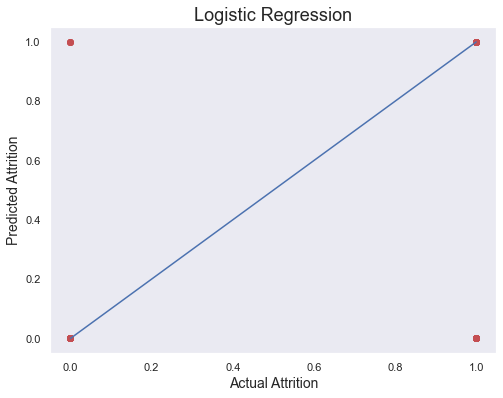

In [249]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_lr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Attrition',fontsize=14)
plt.ylabel('Predicted Attrition',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Regurlarization

As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 1. Ridge

In [252]:
from sklearn.linear_model import RidgeClassifier

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = RidgeClassifier()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [259]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

rd = RidgeClassifier(alpha=0.0001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)
rds = r2_score(y_test,pred_rd)
for j in range(2,10):
    rds = r2_score(y_test,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: -14.532520325203247
Cross Val Score: 86.4625850340136
At cv:- 3
R2 Score: -14.532520325203247
Cross Val Score: 86.12244897959185
At cv:- 4
R2 Score: -14.532520325203247
Cross Val Score: 85.98636861746239
At cv:- 5
R2 Score: -14.532520325203247
Cross Val Score: 86.19047619047619
At cv:- 6
R2 Score: -14.532520325203247
Cross Val Score: 86.19047619047619
At cv:- 7
R2 Score: -14.532520325203247
Cross Val Score: 86.05442176870748
At cv:- 8
R2 Score: -14.532520325203247
Cross Val Score: 86.05443692088382
At cv:- 9
R2 Score: -14.532520325203247
Cross Val Score: 85.98641661263238


At cv:- 6

R2 Score: -14.532520325203247

Cross Val Score: 86.19047619047619

In [261]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 0.1564625850340136
Mean Squared Error: 0.1564625850340136
Root Mean Square Error: 0.3955535172818131


In [262]:
print(accuracy_score(y_test,pred_rd))
print(confusion_matrix(y_test,pred_rd))
print(classification_report(y_test,pred_rd))

0.8435374149659864
[[245   1]
 [ 45   3]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.75      0.06      0.12        48

    accuracy                           0.84       294
   macro avg       0.80      0.53      0.51       294
weighted avg       0.83      0.84      0.78       294



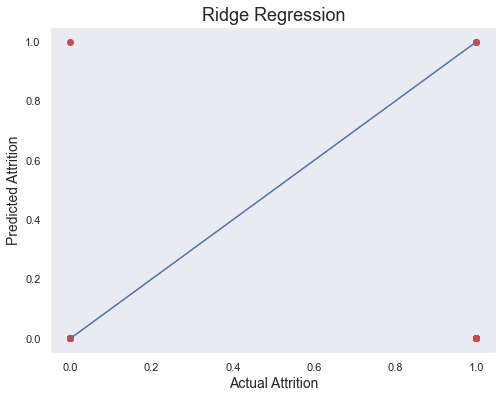

In [263]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Attrition',fontsize=14)
plt.ylabel('Predicted Attrition',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:

DecisionTreeClassifier

In [264]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'],'max_features':['auto', 'sqrt', 'log2']}
dt =DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}


In [270]:
dt = DecisionTreeClassifier(criterion='gini', splitter='random',max_features = 'sqrt')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(y_test,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: -79.26829268292681
Cross Val Score: 76.53061224489797
At cv:- 3
R2 Score: -79.26829268292681
Cross Val Score: 73.40136054421768
At cv:- 4
R2 Score: -79.26829268292681
Cross Val Score: 76.18765549105555
At cv:- 5
R2 Score: -79.26829268292681
Cross Val Score: 76.87074829931973
At cv:- 6
R2 Score: -79.26829268292681
Cross Val Score: 77.07482993197279
At cv:- 7
R2 Score: -79.26829268292681
Cross Val Score: 76.5986394557823
At cv:- 8
R2 Score: -79.26829268292681
Cross Val Score: 77.14532846281777
At cv:- 9
R2 Score: -79.26829268292681
Cross Val Score: 76.60024606381033


At cv:- 6
R2 Score: -79.26829268292681
Cross Val Score: 77.07482993197279

In [274]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))


Error:
Mean Absolute Error: 0.24489795918367346
Mean Squared Error: 0.24489795918367346
Root Mean Square Error: 0.4948716593053935


In [275]:
print(accuracy_score(y_test,pred_decision))
print(confusion_matrix(y_test,pred_decision))
print(classification_report(y_test,pred_decision))

0.7551020408163265
[[209  37]
 [ 35  13]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       246
           1       0.26      0.27      0.27        48

    accuracy                           0.76       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.76      0.76      0.76       294



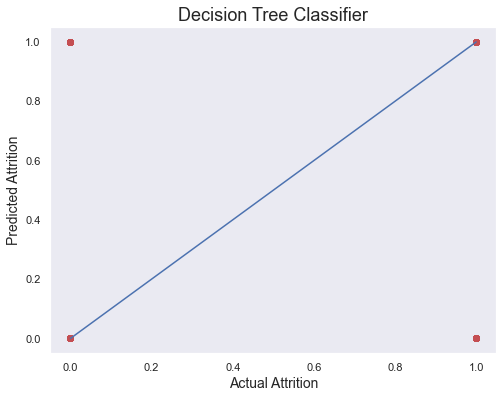

In [276]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Attrition',fontsize=14)
plt.ylabel('Predicted Attrition',fontsize=14)
plt.title('Decision Tree Classifier',fontsize=18)
plt.show()

# Random Forest Classifier

In [269]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}


In [279]:
rf = RandomForestClassifier(criterion='gini',n_estimators=200,max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

rfs = r2_score(y_test,pred_random)
for j in range(2,10):
    print("At cv:-",j)

    rfs = r2_score(y_test,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: -14.532520325203247
Cross Val Score: 85.03401360544217
At cv:- 3
R2 Score: -14.532520325203247
Cross Val Score: 85.03401360544217
At cv:- 4
R2 Score: -14.532520325203247
Cross Val Score: 85.23816046676934
At cv:- 5
R2 Score: -14.532520325203247
Cross Val Score: 85.3061224489796
At cv:- 6
R2 Score: -14.532520325203247
Cross Val Score: 85.23809523809524
At cv:- 7
R2 Score: -14.532520325203247
Cross Val Score: 85.23809523809524
At cv:- 8
R2 Score: -14.532520325203247
Cross Val Score: 85.51132988833452
At cv:- 9
R2 Score: -14.532520325203247
Cross Val Score: 85.03416629258317


In [280]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_random))
print('Mean Squared Error:',mean_squared_error(y_test,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_random)))


Error:
Mean Absolute Error: 0.1564625850340136
Mean Squared Error: 0.1564625850340136
Root Mean Square Error: 0.3955535172818131


In [281]:
print(accuracy_score(y_test,pred_random))
print(confusion_matrix(y_test,pred_random))
print(classification_report(y_test,pred_random))

0.8435374149659864
[[244   2]
 [ 44   4]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       246
           1       0.67      0.08      0.15        48

    accuracy                           0.84       294
   macro avg       0.76      0.54      0.53       294
weighted avg       0.82      0.84      0.79       294



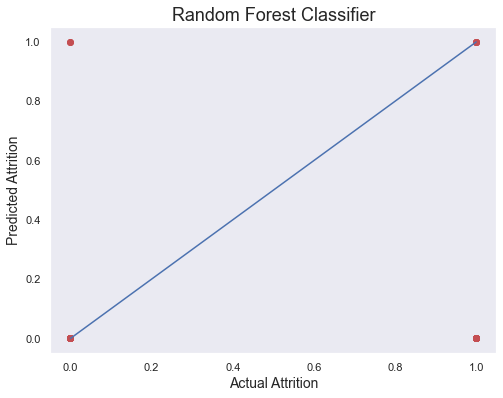

In [282]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_random, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Attrition',fontsize=14)
plt.ylabel('Predicted Attrition',fontsize=14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

# Support Vector Classifier

In [283]:
from sklearn.svm import SVC


parameters = {'kernel':['linear', 'poly', 'rbf'],'gamma':['scale', 'auto'],'cache_size':[50,100,200,300] }
sc = SVC()
clf = GridSearchCV(sc,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'scale', 'kernel': 'linear'}


In [284]:
sv = SVC(kernel='linear',gamma='scale',cache_size=50)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_support = sv.predict(x_test)

svs = r2_score(y_test,pred_support)
print('R2 Score:',rfs*100)

svscore = cross_val_score(sv,x,y,cv=2)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: -14.532520325203247
Cross Val Score: 85.64625850340136


In [285]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_support))
print('Mean Squared Error:',mean_squared_error(y_test,pred_support))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_support)))


Error:
Mean Absolute Error: 0.1292517006802721
Mean Squared Error: 0.1292517006802721
Root Mean Square Error: 0.35951592548908334


In [286]:
print(accuracy_score(y_test,pred_support))
print(confusion_matrix(y_test,pred_support))
print(classification_report(y_test,pred_support))

0.8707482993197279
[[244   2]
 [ 36  12]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       246
           1       0.86      0.25      0.39        48

    accuracy                           0.87       294
   macro avg       0.86      0.62      0.66       294
weighted avg       0.87      0.87      0.84       294



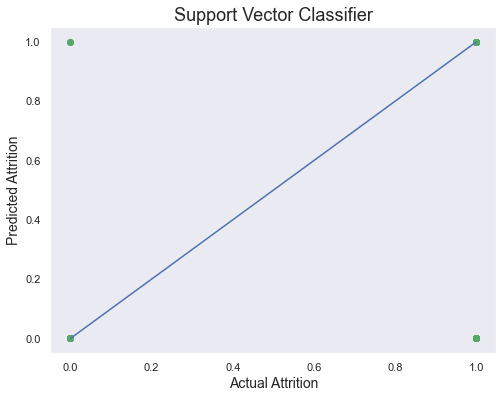

In [287]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_support, color='g')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Attrition',fontsize=14)
plt.ylabel('Predicted Attrition',fontsize=14)
plt.title('Support Vector Classifier',fontsize=18)
plt.show()

# KNeighborsClassifier

In [288]:
from sklearn.neighbors import KNeighborsClassifier

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsClassifier()
clf = GridSearchCV(kn,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [291]:
kn = KNeighborsClassifier(algorithm = 'auto', weights = 'distance',n_neighbors=10)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred_k = kn.predict(x_test)

kns = r2_score(y_test,pred_k)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=4)
kvc = knscore.mean() 
print('Cross Val Score:',kvc*2)

R2 Score: -22.002032520325177
Cross Val Score: 1.6938825376140267


In [292]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_k))
print('Mean Squared Error:',mean_squared_error(y_test,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_k)))


Error:
Mean Absolute Error: 0.16666666666666666
Mean Squared Error: 0.16666666666666666
Root Mean Square Error: 0.408248290463863


In [293]:
print(accuracy_score(y_test,pred_support))
print(confusion_matrix(y_test,pred_support))
print(classification_report(y_test,pred_support))

0.8707482993197279
[[244   2]
 [ 36  12]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       246
           1       0.86      0.25      0.39        48

    accuracy                           0.87       294
   macro avg       0.86      0.62      0.66       294
weighted avg       0.87      0.87      0.84       294



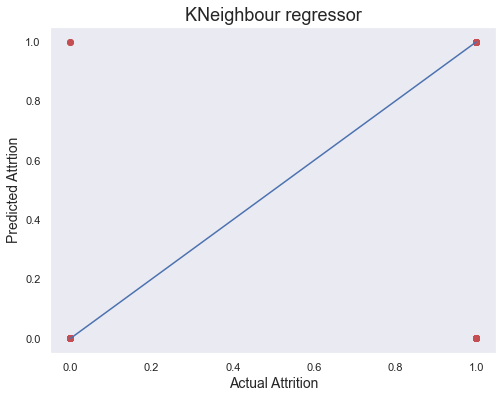

In [294]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_support, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Attrition',fontsize=14)
plt.ylabel('Predicted Attrtion',fontsize=14)
plt.title('KNeighbour regressor',fontsize=18)
plt.show()


# We tested 6 models out of which Logistic Regression performing good:

Conclusion

In [296]:
import numpy as np
a=np.array(y_test)
a

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

In [297]:
predicted=np.array(pred_test)
predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [298]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [299]:
df_com

,original,predicted
0,1,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
289,0,0
290,1,0
291,0,0
292,0,0


In [302]:
df_com.sample(10)

,original,predicted
277,0,0
76,0,0
84,0,0
53,1,1
278,0,0
1,1,1
103,0,0
37,0,0
34,0,0
211,0,0


# The best model is Logistic regression as r2_score is best from above tested models.



In [303]:
rscore=cross_val_score(lr,x,y,cv=8)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 86.60032919347597
accuracy_score is :- 87.41496598639455


Our Model performs with Accuracy Score 87.41%...

# Saving the best models with initials...using pickle library

In [305]:
import pickle
filename = 'HR_data.pkl'
pickle.dump(lr, open(filename, 'wb'))